# transmon_cont_env

In [1]:
# copy file to modify here

In [1]:
import gym
import gym_transmon_cont
from gym_utils import *

# Two-qubit examples
## sqrtZX - quspin

In [2]:
# physical setting
sim_name = 'quspin'
num_transmon = 2
num_level = 3
sim_frame_rotation = False
drive = np.array([100*MHz, 14*MHz])
detune = np.array([115*MHz, 0])
anharm = np.array([-319.7*MHz, -320.2*MHz])
coupling = np.array([1.87*MHz])
ctrl_noise = 0

# objective
num_seg = 100
duration = 224 #in ns
duration_gauss = int(73/duration*num_seg)
duration_const = int(115/duration*num_seg)
duration_drag = int(36/duration*num_seg)
dt = duration/num_seg*nanosec
target_gate = 'sqrtZX'

# state
rl_state = 'ket'
pca_order = (4,2)

# reward
reward_type = 'average'
reward_scheme = 'local-fidelity-difference'
fid_threshold = 0.999
worstfid_method = 'SLSQP-ket-7'

# action
channels = [0,1,2,3]
sub_action_scale = None
end_amp_window = None
evolve_method = 'exact'

kw = initialize_transmon_env(sim_name,num_transmon, num_level, sim_frame_rotation,
                             drive, detune, anharm, coupling, ctrl_noise,
                             num_seg, dt, target_gate,
                             rl_state, pca_order,
                             reward_type, reward_scheme, fid_threshold, worstfid_method,
                             channels, sub_action_scale, end_amp_window, evolve_method)
# env = ContinuousTransmonEnv(**kw)
env = gym.make('transmon-cont-v7',**kw)

---Initiating Transmon Environment with Continuous Action---
-   Noiseless control


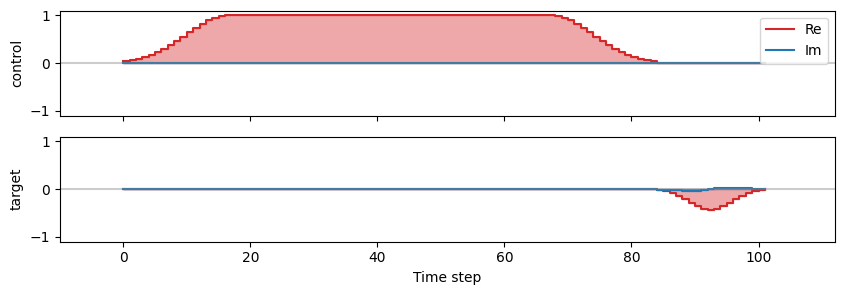

-----------------------------------------------
Average fidelity:    0.9941521407860391
Worst case fidelity: 0.9899313136655703


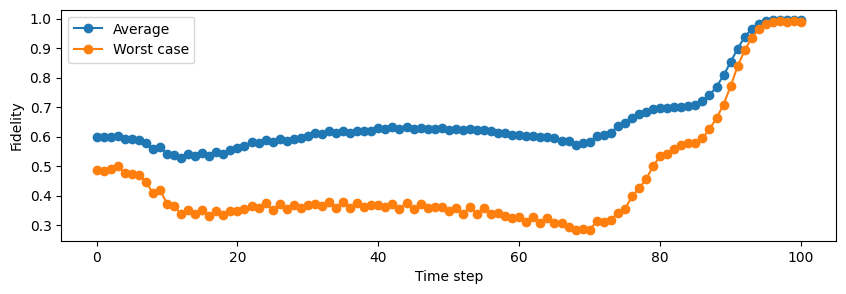

Max worst case fidelity: 0.9908838993480942 at step 100


0.09351152570522347

In [3]:
# cross-resonance
sig = 14.5/(duration/num_seg)
amp = 1
phase = 0

x_gauss = np.linspace(0,duration_gauss,duration_gauss+1)
x_const = np.ones(duration_const)
cr1_pulse = cr1(x_gauss,x_const,amp,sig,phase)

# drag
sig = 7.3/(duration/num_seg)
amp = -0.43
beta = 0.4

x_drag = np.linspace(0,duration_drag,duration_drag+1)
drag_pulse = drag(x_drag,amp,beta,sig)

# combine
cr1_total_pulse = np.hstack([cr1_pulse,np.zeros_like(cr1_pulse)])
drag_total_pulse = np.hstack([np.zeros_like(drag_pulse),drag_pulse])
total_pulse = np.vstack([cr1_total_pulse,drag_total_pulse])

channel_labels = ['control','target']
plot_pulse(total_pulse,channel_labels)
plt.show()

# run environment
env.step_params['reward_type'] = 'average'
env.reset()
avg_fids = []
states = []
for action in total_pulse:
    state,reward,done,_ = env.step(action)
    avg_fids.append(env.fid)
    states.append(state)
avg_fids = np.array(avg_fids)
states = np.array(states)

env.step_params['reward_type'] = 'worst'
env.reset()
worst_fids = []
for action in total_pulse:
    state,reward,done,_ = env.step(action)
    worst_fids.append(env.fid)
worst_fids = np.array(worst_fids)

print('-----------------------------------------------')
print(f'Average fidelity:    {avg_fids[-1]}')
print(f'Worst case fidelity: {worst_fids[-1]}')

plt.figure(figsize=(10,3))
plt.plot(avg_fids,'o-',label='Average')
plt.plot(worst_fids,'o-',label='Worst case')
plt.xlabel('Time step')
plt.ylabel('Fidelity')
plt.legend()
plt.show()
print(f'Max worst case fidelity: {worst_fids.max()} at step {worst_fids.argmax()+1}')
abs(total_pulse[1:]-total_pulse[:-1]).max()

## sqrtZX - TransmonDuffingSimulator

In [15]:
# physical setting
sim_name = 'TransmonDuffingSimulator'
num_transmon = 2
num_level = 3
sim_frame_rotation = False

anharm   = 2*np.pi * np.array([-319.7,-320.2])*MHz
drive    = 2*np.pi * np.array([28,200,28,200])*MHz
detune   = 2*np.pi * np.array([115,0])*MHz
coupling = 2*np.pi * np.array([1.87])*MHz

ctrl_noise = 0

# objective
num_seg = 100
duration = 224 #in ns
duration_gauss = int(73/duration*num_seg)
duration_const = int(115/duration*num_seg)
duration_drag = int(36/duration*num_seg)
dt = duration/num_seg*nanosec
target_gate = 'sqrtZX'

# state
rl_state = 'ket'
pca_order = (4,2)

# reward
reward_type = 'worst'
reward_scheme = 'local-fidelity-difference'
fid_threshold = 0.999
worstfid_method = 'SLSQP-ket-7'

# action
channels = [2,3,4,5]
sub_action_scale = None
end_amp_window = None
evolve_method = 'exact'

kw = initialize_transmon_env(sim_name,num_transmon, num_level, sim_frame_rotation,
                             drive, detune, anharm, coupling, ctrl_noise,
                             num_seg, dt, target_gate,
                             rl_state, pca_order,
                             reward_type, reward_scheme, fid_threshold, worstfid_method,
                             channels, sub_action_scale, end_amp_window, evolve_method)
# env = ContinuousTransmonEnv(**kw)
env = gym.make('transmon-cont-v7',**kw)

---Initiating Transmon Environment with Continuous Action---
-   Noiseless control


-----------------------------------------------
Final fidelities
  Average: 0.9942
  Worst  : 0.9900
Max worst-case fidelity: 0.9909 at step 100


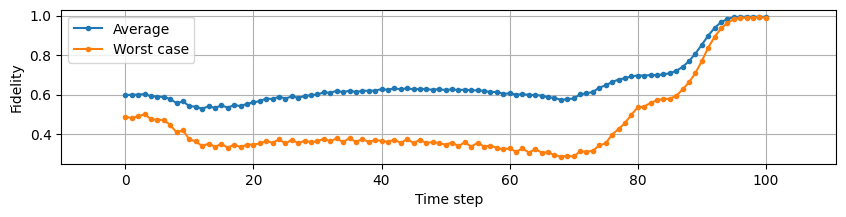

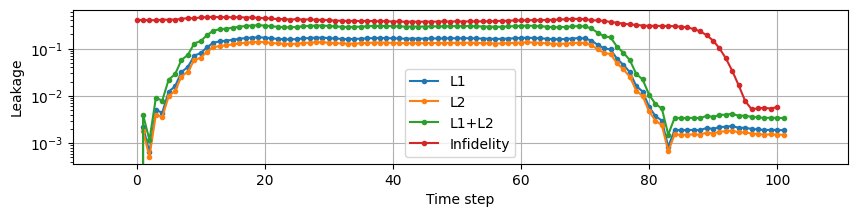

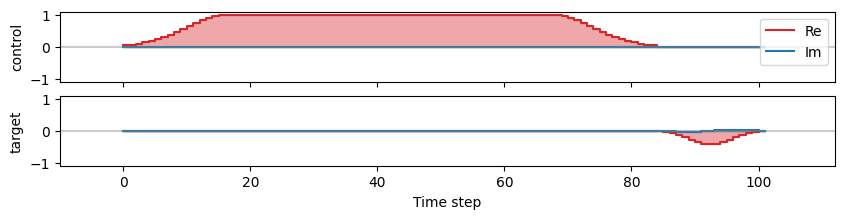

In [16]:
# cross-resonance
sig = 14.5/(duration/num_seg)
amp = 1
phase = 0

x_gauss = np.linspace(0,duration_gauss,duration_gauss+1)
x_const = np.ones(duration_const)
cr1_pulse = cr1(x_gauss,x_const,amp,sig,phase)

# drag
sig = 7.3/(duration/num_seg)
amp = -0.43
beta = 0.4

x_drag = np.linspace(0,duration_drag,duration_drag+1)
drag_pulse = drag(x_drag,amp,beta,sig)

# combine
cr1_total_pulse = np.hstack([cr1_pulse,np.zeros_like(cr1_pulse)])
drag_total_pulse = np.hstack([np.zeros_like(drag_pulse),drag_pulse])
total_pulse = np.vstack([cr1_total_pulse,drag_total_pulse])

channel_labels = ['control','target']

# run environment
env.reset()
avg_fids = []
worst_fids = []
leakages = []
for action in total_pulse:
    state,reward,done,_ = env.step(action)
    avg_fids.append(env.avg_fid)
    worst_fids.append(env.fid)
    leakages.append(env.leakage)
avg_fids = np.array(avg_fids)
worst_fids = np.array(worst_fids)
leakages = np.array(leakages)

print('-----------------------------------------------')
print('Final fidelities')
print(f'  Average: {avg_fids[-1]:.4f}')
print(f'  Worst  : {worst_fids[-1]:.4f}')
print(f'Max worst-case fidelity: {worst_fids.max():.4f} at step {worst_fids.argmax()+1}')

# Plot fidelities
plt.figure(figsize=(10,2))
plt.plot(avg_fids,'o-',markersize=3,label='Average')
plt.plot(worst_fids,'o-',markersize=3,label='Worst case')
plt.xlim([-int(0.1*len(avg_fids)),len(avg_fids)+int(0.1*len(avg_fids))])
plt.xlabel('Time step')
plt.ylabel('Fidelity')
plt.legend()
plt.grid()
plt.show()

# Plot leakages
plt.figure(figsize=(10,2))
plt.plot(leakages,'o-',markersize=3,label=['L1','L2'])
plt.plot(leakages.sum(1),'o-',markersize=3,label='L1+L2')
plt.plot(1-avg_fids,'o-',markersize=3,label='Infidelity')
plt.xlim([-int(0.1*len(avg_fids)),len(avg_fids)+int(0.1*len(avg_fids))])
plt.yscale('log')
plt.xlabel('Time step')
plt.ylabel('Leakage')
plt.legend()
plt.grid()
plt.show()

plot_pulse(total_pulse,channel_labels)
plt.show()

## SWAP - TransmonDuffingSimulator

In [9]:
# physical setting
sim_name = 'TransmonDuffingSimulator'
num_transmon = 2
num_level = 3
sim_frame_rotation = False

dt = 4*nanosec
anharm   = 2*np.pi * np.array([-319.7,-320.2])*MHz
drive    = 2*np.pi * np.array([30,300,30,300])*MHz
detune   = 2*np.pi * np.array([115,0])*MHz
coupling = 2*np.pi * np.array([1.87])*MHz
ctrl_noise = 0

# objective
num_seg = 160
target_gate = 'SWAP'

# state
rl_state = 'ket'
pca_order = (4,2)

# reward
reward_type = 'worst'
reward_scheme = 'local-fidelity-difference'
fid_threshold = 0.999
worstfid_method = 'SLSQP-ket-7'

# action
channels = list(range(8))
# action_size = 8
sub_action_scale = None
end_amp_window = None
evolve_method = 'exact'

kw = initialize_transmon_env(sim_name,num_transmon, num_level, sim_frame_rotation,
                             drive, detune, anharm, coupling, ctrl_noise,
                             num_seg, dt, target_gate,
                             rl_state, pca_order,
                             reward_type, reward_scheme, fid_threshold, worstfid_method,
                             channels, sub_action_scale, end_amp_window, evolve_method)
env = gym.make('transmon-cont-v7',**kw)
# env = ContinuousTransmonEnv(**kw)

---Initiating Transmon Environment with Continuous Action---
-   Noiseless control


-----------------------------------------------
Final fidelities
  Average: 0.9885
  Worst  : 0.9778
Max worst-case fidelity: 0.9778 at step 160
Max amp difference: 0.44


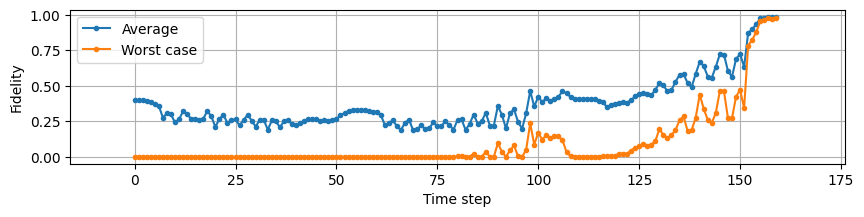

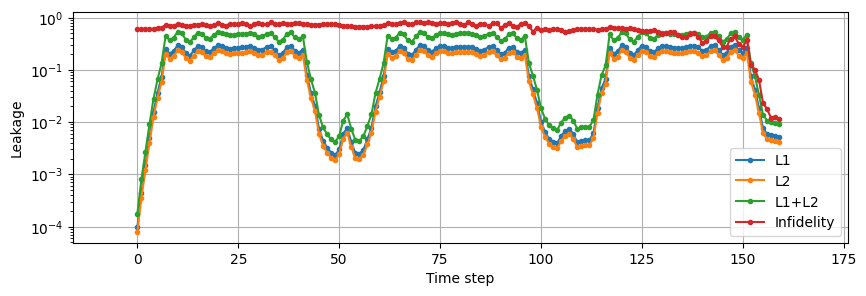

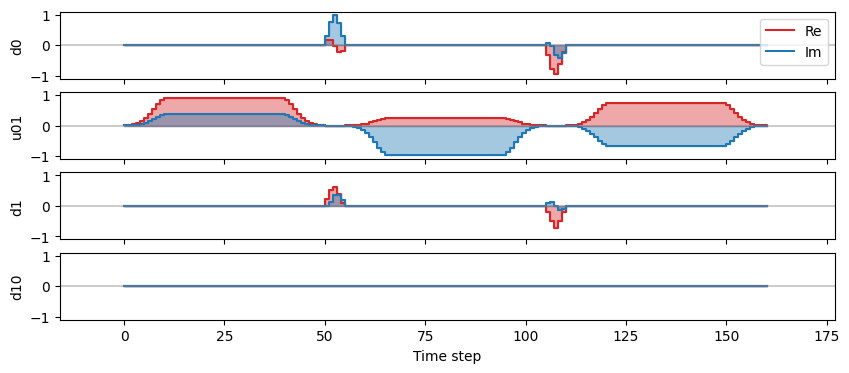

In [12]:
# Saved optimized angles
x_X90I = np.array([ 1.        ,  0.25705079, -0.46631134, -1.33888415])
x_IX90 = np.array([ 0.71479103,  0.24319973, -0.41055427, -0.11303429])
x_CNOT = np.array([ 0.45272866,  1.        ,  0.15123441, -0.15832501])
x_SWAP = np.array([ 0.40192683, 1.60814476 ,  0.50891225, -1.31562956, 
                   -2.81163055, -3.13722026, -0.74656652])

channel_labels = ['d0','u01','d1','d10']

drag_pulse_0 = DRAG(5, *x_X90I[:-1])
drag_pulse_1 = DRAG(5, *x_IX90[:-1])
GS_pulse = GaussianSquare(50, *x_CNOT[:-1])

cnot_pulse_1 = np.zeros([len(GS_pulse),8])
cnot_pulse_1[:,2:4] = Z_shift(GS_pulse,x_SWAP[0])

hh_pulse_1 = np.zeros([len(drag_pulse_0),8])
hh_pulse_1[:, :2] = Z_shift(drag_pulse_0,x_SWAP[1])
hh_pulse_1[:,4:6] = Z_shift(drag_pulse_1,x_SWAP[2])

cnot_pulse_2 = np.zeros([len(GS_pulse),8])
cnot_pulse_2[:,2:4] = Z_shift(GS_pulse,x_SWAP[3])

hh_pulse_2 = np.zeros([len(drag_pulse_0),8])
hh_pulse_2[:, :2] = Z_shift(drag_pulse_0,x_SWAP[4])
hh_pulse_2[:,4:6] = Z_shift(drag_pulse_1,x_SWAP[5])

cnot_pulse_3 = np.zeros([len(GS_pulse),8])
cnot_pulse_3[:,2:4] = Z_shift(GS_pulse,x_SWAP[6])

total_pulse = np.vstack([cnot_pulse_1,hh_pulse_1,
                         cnot_pulse_2,hh_pulse_2,cnot_pulse_3])

max_diff = abs(total_pulse[1:,:]-total_pulse[:-1,:]).max()

# run environment
env.reset()
avg_fids = []
worst_fids = []
leakages = []
for action in total_pulse:
    state,reward,done,_ = env.step(action)
    avg_fids.append(env.avg_fid)
    worst_fids.append(env.fid)
    leakages.append(env.leakage)
avg_fids = np.array(avg_fids)
worst_fids = np.array(worst_fids)
leakages = np.array(leakages)

print('-----------------------------------------------')
print('Final fidelities')
print(f'  Average: {avg_fids[-1]:.4f}')
print(f'  Worst  : {worst_fids[-1]:.4f}')
print(f'Max worst-case fidelity: {worst_fids.max():.4f} at step {worst_fids.argmax()+1}')
print(f'Max amp difference: {max_diff:.2f}')

# Plot fidelities
plt.figure(figsize=(10,2))
plt.plot(avg_fids,'o-',markersize=3,label='Average')
plt.plot(worst_fids,'o-',markersize=3,label='Worst case')
plt.xlim([-int(0.1*len(avg_fids)),len(avg_fids)+int(0.1*len(avg_fids))])
plt.xlabel('Time step')
plt.ylabel('Fidelity')
plt.legend()
plt.grid()
plt.show()

# Plot leakages
plt.figure(figsize=(10,3))
plt.plot(leakages,'o-',markersize=3,label=['L1','L2'])
plt.plot(leakages.sum(1),'o-',markersize=3,label='L1+L2')
plt.plot(1-avg_fids,'o-',markersize=3,label='Infidelity')
plt.xlim([-int(0.1*len(avg_fids)),len(avg_fids)+int(0.1*len(avg_fids))])
plt.yscale('log')
plt.xlabel('Time step')
plt.ylabel('Leakage')
plt.legend()
plt.grid()
plt.show()

plot_pulse(total_pulse,channel_labels)
plt.show()

# Testing: leakage

In [2]:
# physical setting
sim_name = 'TransmonDuffingSimulator'
num_transmon = 2
num_level = 3
sim_frame_rotation = False

anharm   = 2*np.pi * np.array([-319.7,-320.2])*MHz
drive    = 2*np.pi * np.array([28,200,28,200])*MHz
detune   = 2*np.pi * np.array([115,0])*MHz
coupling = 2*np.pi * np.array([1.87])*MHz

ctrl_noise = 0

# objective
num_seg = 100
duration = 224 #in ns
duration_gauss = int(73/duration*num_seg)
duration_const = int(115/duration*num_seg)
duration_drag = int(36/duration*num_seg)
dt = duration/num_seg*nanosec
target_gate = 'sqrtZX'

# state
rl_state = 'ket'
pca_order = (4,2)

# reward
reward_type = 'average'
reward_scheme = 'local-fidelity-difference'
fid_threshold = 0.999
worstfid_method = 'SLSQP-ket-7'

# action
channels = '23'
channels = np.hstack([[2*(int(c)-1),2*(int(c)-1)+1] for c in channels])
sub_action_scale = None
end_amp_window = None
evolve_method = 'exact'

kw = initialize_transmon_env(sim_name,num_transmon, num_level, sim_frame_rotation,
                             drive, detune, anharm, coupling, ctrl_noise,
                             num_seg, dt, target_gate,
                             rl_state, pca_order,
                             reward_type, reward_scheme, fid_threshold, worstfid_method,
                             channels, sub_action_scale, end_amp_window, evolve_method)
# env = ContinuousTransmonEnv(**kw)
env = gym.make('transmon-cont-v7',**kw)

---Initiating Transmon Environment with Continuous Action---
-   Noiseless control


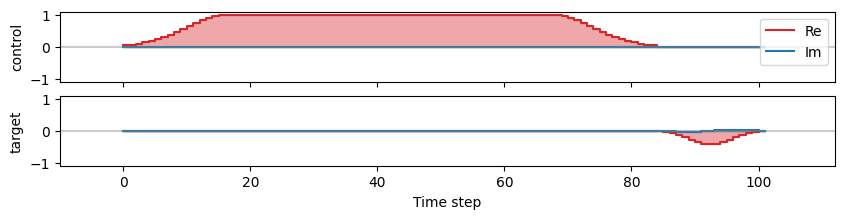

In [3]:
# cross-resonance
sig = 14.5/(duration/num_seg)
amp = 1
phase = 0

x_gauss = np.linspace(0,duration_gauss,duration_gauss+1)
x_const = np.ones(duration_const)
cr1_pulse = cr1(x_gauss,x_const,amp,sig,phase)

# drag
sig = 7.3/(duration/num_seg)
amp = -0.43
beta = 0.4

x_drag = np.linspace(0,duration_drag,duration_drag+1)
drag_pulse = drag(x_drag,amp,beta,sig)

# combine
cr1_total_pulse = np.hstack([cr1_pulse,np.zeros_like(cr1_pulse)])
drag_total_pulse = np.hstack([np.zeros_like(drag_pulse),drag_pulse])
total_pulse = np.vstack([cr1_total_pulse,drag_total_pulse])

channel_labels = ['control','target']
plot_pulse(total_pulse,channel_labels)
plt.show()

# run environment
env.step_params['reward_type'] = 'average'
env.reset()
avg_fids = []
states = []
maps = []
leakages = []
for action in total_pulse:
    state,reward,done,_ = env.step(action)
    avg_fids.append(env.fid)
    states.append(state)
    maps.append(env.map)
    leakages.append(env.leakage)
avg_fids = np.array(avg_fids)
states = np.array(states)
maps = np.array(maps)
leakages = np.array(leakages)

# env.step_params['reward_type'] = 'worst'
# env.reset()
# worst_fids = []
# for action in total_pulse:
#     state,reward,done,_ = env.step(action)
#     worst_fids.append(env.fid)
# worst_fids = np.array(worst_fids)

# print('-----------------------------------------------')
# print(f'Average fidelity:    {avg_fids[-1]}')
# print(f'Worst case fidelity: {worst_fids[-1]}')

# plt.figure(figsize=(10,3))
# plt.plot(avg_fids,'o-',label='Average')
# plt.plot(worst_fids,'o-',label='Worst case')
# plt.xlabel('Time step')
# plt.ylabel('Fidelity')
# plt.legend()
# plt.show()
# print(f'Max worst case fidelity: {worst_fids.max()} at step {worst_fids.argmax()+1}')
# abs(total_pulse[1:]-total_pulse[:-1]).max()

In [5]:
# run environment
env.step_params['reward_type'] = 'average'
env.reset()
avg_fids = []
states = []
maps = []
for action in total_pulse:
    state,reward,done,_ = env.step(action)
    avg_fids.append(env.fid)
    states.append(state)
    maps.append(env.map)
avg_fids = np.array(avg_fids)
states = np.array(states)
maps = np.array(maps)

In [54]:
def projectors(num_level):
    projs = []
    for i in range(num_level):
        proj = np.zeros([num_level,num_level])
        proj[i,i] = 1
        projs.append(proj)
    return projs

In [72]:
maps.shape

(101, 9, 9)

In [166]:
num_level = 3
I2 = np.zeros([num_level,num_level])
I2[:2,:2] = I.copy()/2
I2I2 = tensor([I2,I2])
projs = projectors(num_level)
# proj02 = tensor([projs[0],projs[2]])
# proj12 = tensor([projs[1],projs[2]])
# proj20 = tensor([projs[2],projs[0]])
# proj21 = tensor([projs[2],projs[1]])
# proj22 = tensor([projs[2],projs[2]])
# projs2 = np.stack([proj02,proj12,proj20,proj21,proj22])
# labels = ['02','12','20','21','22']

In [323]:
def channel(rho,Us):
    return np.einsum('mij,jk,mlk->mil',Us,rho,Us.conj())

I2 = np.diag([0,0,1,0,0,1,1,1,1])
I1 = np.diag([1,1,0,1,1,0,0,0,0])


In [333]:
_, qubit_proj = qubit_subspace(num_level,num_transmon)

In [4]:
env.qubit_proj

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
I1.sum()

4

In [11]:
env.reset()

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
len(total_pulse)

101

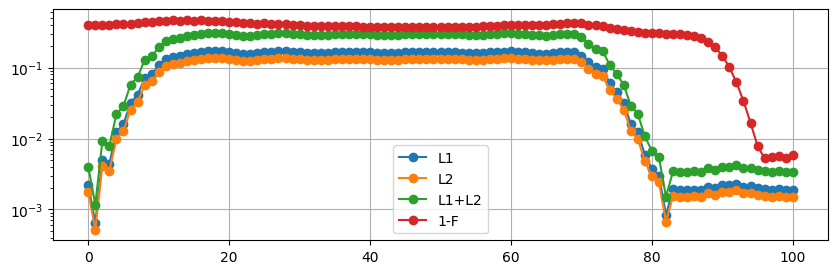

In [16]:
plt.figure(figsize=(10,3))
plt.plot(leakages,'o-',label=['L1','L2'])
plt.plot(leakages.sum(1),'o-',label='L1+L2')
plt.plot(1-avg_fids,'o-',label='1-F')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

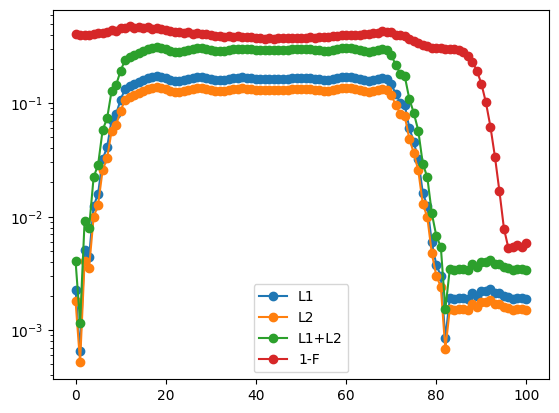

In [339]:
plt.plot(L1,'o-',label='L1')
plt.plot(L2,'o-',label='L2')
plt.plot(L1+L2,'o-',label='L1+L2')
plt.plot(1-avg_fids,'o-',label='1-F')
plt.yscale('log')
plt.legend()
plt.show()

array([0.59791465, 0.59876389, 0.59969453, 0.60283667, 0.59196781,
       0.5900845 , 0.58767002, 0.57793061, 0.55629922, 0.56555229,
       0.54138683, 0.53891373, 0.52776889, 0.5413854 , 0.53260076,
       0.54503554, 0.53420044, 0.54677749, 0.54184948, 0.55330642,
       0.56068947, 0.56675925, 0.58016545, 0.57742669, 0.58959833,
       0.58020441, 0.59075255, 0.58412884, 0.59289551, 0.59663147,
       0.60092633, 0.61131428, 0.60930092, 0.619335  , 0.61197479,
       0.6201661 , 0.61334077, 0.61897517, 0.61950172, 0.62058752,
       0.62749398, 0.62458431, 0.63198105, 0.62647539, 0.63225646,
       0.62636913, 0.62886738, 0.62736892, 0.62459344, 0.62798024,
       0.62261093, 0.62712739, 0.62231502, 0.62573051, 0.62167743,
       0.62155969, 0.61919312, 0.61268513, 0.61321946, 0.60421349,
       0.60579663, 0.60041855, 0.60169212, 0.5992098 , 0.59716057,
       0.59531136, 0.58591074, 0.58444623, 0.57286513, 0.57673326,
       0.58028184, 0.60118147, 0.60642429, 0.61330442, 0.63544

In [329]:
L1

array([0.00223994, 0.00064718, 0.00504989, 0.00442312, 0.0122958 ,
       0.01594938, 0.03202827, 0.0408565 , 0.07123633, 0.08029391,
       0.10717079, 0.13376147, 0.14239471, 0.14703489, 0.1536164 ,
       0.1606963 , 0.16705369, 0.17108823, 0.1728055 , 0.17094189,
       0.1654524 , 0.16049855, 0.15726763, 0.15613916, 0.15924215,
       0.16400265, 0.16769367, 0.17062962, 0.17043561, 0.16698829,
       0.16371726, 0.16053776, 0.15848281, 0.15990771, 0.16226587,
       0.16447887, 0.16723768, 0.16777772, 0.16651917, 0.16566791,
       0.16374013, 0.16213596, 0.16252273, 0.16240558, 0.16257046,
       0.1639589 , 0.16401806, 0.16416697, 0.16550278, 0.16557007,
       0.16570298, 0.16620599, 0.16461288, 0.16286909, 0.16185266,
       0.16024538, 0.16074201, 0.16333928, 0.16540819, 0.16808627,
       0.16973682, 0.16786866, 0.16505928, 0.16176076, 0.15796575,
       0.15748986, 0.15991957, 0.16330822, 0.16668494, 0.16377029,
       0.14799107, 0.12000199, 0.10094495, 0.0960297 , 0.06076

In [ ]:
channel(

In [308]:
trace_comp = (I2I2_evolved@I_comp).trace(axis1=1,axis2=2).real
trace_leak = (I2I2_evolved@I_leak).trace(axis1=1,axis2=2).real

In [311]:
trace_leak

array([0.00223994, 0.00064718, 0.00504989, 0.00442312, 0.0122958 ,
       0.01594938, 0.03202827, 0.0408565 , 0.07123633, 0.08029391,
       0.10717079, 0.13376147, 0.14239471, 0.14703489, 0.1536164 ,
       0.1606963 , 0.16705369, 0.17108823, 0.1728055 , 0.17094189,
       0.1654524 , 0.16049855, 0.15726763, 0.15613916, 0.15924215,
       0.16400265, 0.16769367, 0.17062962, 0.17043561, 0.16698829,
       0.16371726, 0.16053776, 0.15848281, 0.15990771, 0.16226587,
       0.16447887, 0.16723768, 0.16777772, 0.16651917, 0.16566791,
       0.16374013, 0.16213596, 0.16252273, 0.16240558, 0.16257046,
       0.1639589 , 0.16401806, 0.16416697, 0.16550278, 0.16557007,
       0.16570298, 0.16620599, 0.16461288, 0.16286909, 0.16185266,
       0.16024538, 0.16074201, 0.16333928, 0.16540819, 0.16808627,
       0.16973682, 0.16786866, 0.16505928, 0.16176076, 0.15796575,
       0.15748986, 0.15991957, 0.16330822, 0.16668494, 0.16377029,
       0.14799107, 0.12000199, 0.10094495, 0.0960297 , 0.06076

In [313]:
pop2s.sum(1)-trace_leak

array([ 4.33680869e-19,  0.00000000e+00, -8.67361738e-19,  0.00000000e+00,
        0.00000000e+00,  3.46944695e-18, -6.93889390e-18,  6.93889390e-18,
       -1.38777878e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.77555756e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.77555756e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.77555756e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.77555756e-17,  2.77555756e-17,
       -2.77555756e-17, -2.77555756e-17, -2.77555756e-17,  2.77555756e-17,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.77555756e-17,
       -2.77555756e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.77555756e-17, -2.77555756e-17, -2.77555756e-17,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [252]:
projs_all = np.zeros([num_level,num_level,num_level**2,num_level**2])
projs2 = []
labels2 = []
for i in range(num_level):
    for j in range(num_level):
        projs_all[i,j] = tensor([projs[i],projs[j]])
        if i==2 or j==2:
            projs2.append(projs_all[i,j])
            labels2.append(f'{i}{j}')
projs2 = np.array(projs2)

In [255]:
I2I2_evolved = np.einsum('mij,jk,mlk->mil',maps,I2I2,maps.conj())
pop2s = np.einsum('mij,nji->mn',I2I2_evolved,projs2)
pops = np.einsum('mij,noji->mno',I2I2_evolved,projs_all)
assert abs(pop2s.imag).max() < 1e-10
assert abs(pops.imag).max() < 1e-10
pops = pops.real
pop2s = pop2s.real
labels = [f'{i}{j}' for i in range(num_level) for j in range(num_level)]

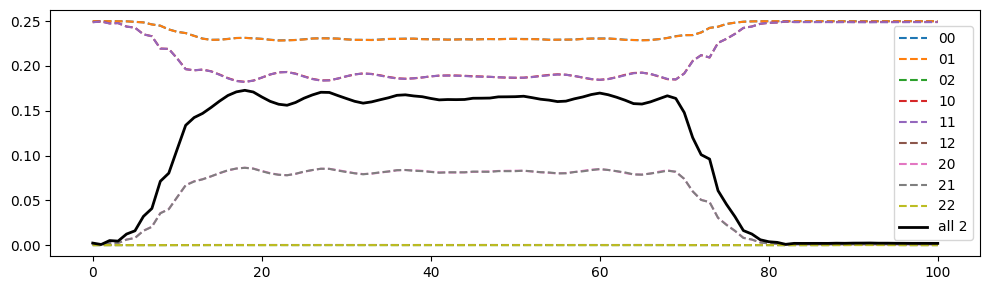

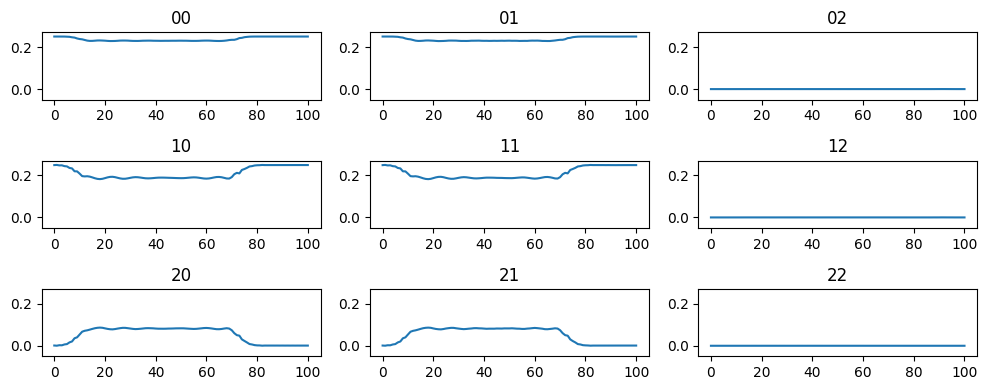

In [264]:
plt.figure(figsize=(10,3))
plt.plot(pops.reshape(pops.shape[0],-1),'--',label=labels)
plt.plot(pop2s.sum(1),'k',linewidth=2,label='all 2')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
for i in range(num_level):
    for j in range(num_level):
        plt.subplot(num_level,num_level,num_level*i+j+1)
        plt.plot(pops[:,i,j],markersize=3)
        plt.ylim([-0.05,0.27])
        plt.title(f'{i}{j}')
        # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.show()

In [278]:
average_over_pure_states((env.map@env.target_unitary.T.conj())[None,:])

0.12003550173690429

In [277]:
M,_ = projected_overlap(env.map,env.target_unitary,env.qubit_indices,correct_Z_after=True)
average_over_pure_states(M)

0.9941521407860294

In [76]:
f'{date.today()}'

'2022-09-25'

In [67]:
start_time = datetime.now()#.replace(microsecond=0)



In [68]:
end_time = datetime.now()#.replace(microsecond=0)
delta = end_time-start_time
print(delta)

0:00:01.695714


In [72]:
delta.total_seconds()

1.695714

In [38]:

start_time = datetime.now()
d = date_time.strftime("%m/%d/%Y, %H:%M:%S")
print("Output 2:", d)	

Output 2: 09/24/2022, 12:43:54


In [67]:
dFavg = avg_fids-np.hstack([[env.avg_fid],avg_fids[:-1]])
env.reset()
print(avg_fids[-1])
env.avg_fid+dFavg.sum()

0.9884709348088542


0.9884709348088542

In [69]:
dNLI = NLI(avg_fids)-NLI(np.hstack([[env.avg_fid],avg_fids[:-1]]))
print(NLI(avg_fids[-1]))
NLI(env.avg_fid)+dNLI.sum()

1.9382059050891387


1.9382059050891387

In [47]:
env.avg_fid

0.4

0.9885823077527688

In [25]:
NLI(avg_fids[-1])

1.9382059050891387

In [50]:
dNLI = dFavg/(1-Favg)/np.log(10)
# dNLI = dFavg/(1-avg_fids[:-1])/np.log(10)
NLI(env.avg_fid)+dNLI.sum()

1.8555099449465462

In [57]:
print(avg_fids[-1])
NLI(avg_fids[-1])

0.9884709348088542


1.9382059050891387

In [58]:
dNLI = NLI(avg_fids)[1:]-NLI(avg_fids)[:-1]
NLI(env.avg_fid)+dNLI.sum()

1.9382865120331354

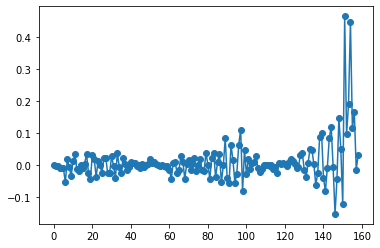

In [59]:
plt.plot(dNLI,'o-')

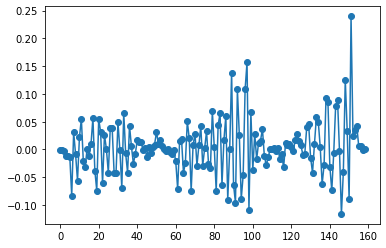

In [60]:
plt.plot(dFavg,'o-')

In [100]:
a = np.random.random((10,4)).round(3)
b = np.zeros((10,8))
channels = [0,1,4,5]
b[:,channels] = a
b

array([[0.998, 0.666, 0.   , 0.   , 0.262, 0.329, 0.   , 0.   ],
       [0.355, 0.361, 0.   , 0.   , 0.55 , 0.497, 0.   , 0.   ],
       [0.064, 0.789, 0.   , 0.   , 0.411, 0.81 , 0.   , 0.   ],
       [0.89 , 0.887, 0.   , 0.   , 0.516, 0.805, 0.   , 0.   ],
       [0.087, 0.708, 0.   , 0.   , 0.899, 0.337, 0.   , 0.   ],
       [0.641, 0.424, 0.   , 0.   , 0.446, 0.185, 0.   , 0.   ],
       [0.265, 0.269, 0.   , 0.   , 0.167, 0.97 , 0.   , 0.   ],
       [0.151, 0.645, 0.   , 0.   , 0.237, 0.76 , 0.   , 0.   ],
       [0.504, 0.97 , 0.   , 0.   , 0.623, 0.308, 0.   , 0.   ],
       [0.732, 0.394, 0.   , 0.   , 0.266, 0.552, 0.   , 0.   ]])

In [87]:
np.stack([channels,np.array(channels)+1

array([1, 4])